In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
super_store = pd.read_csv('SampleSuperstore.csv')
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
super_store.shape

(9994, 13)

In [20]:
super_store.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5 MB


In [21]:
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

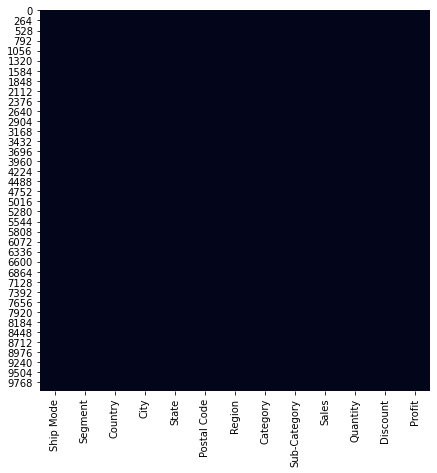

In [22]:
plt.figure(figsize = (7, 7))
sns.heatmap(super_store.isnull(), cbar = False);

In [23]:
#Let's have a look at the values of each feature
for i in super_store.columns:
    print('***************',i,'***************')
    print(super_store[i].value_counts(), '\n')

*************** Ship Mode ***************
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 

*************** Segment ***************
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64 

*************** Country ***************
United States    9994
Name: Country, dtype: int64 

*************** City ***************
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Aberdeen           1
Montebello         1
Layton             1
Champaign          1
Glenview           1
Name: City, Length: 531, dtype: int64 

*************** State ***************
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North

In [24]:
super_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [25]:
super_store.drop(['Postal Code', 'Country'], axis = 1, inplace = True)

In [26]:
super_store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


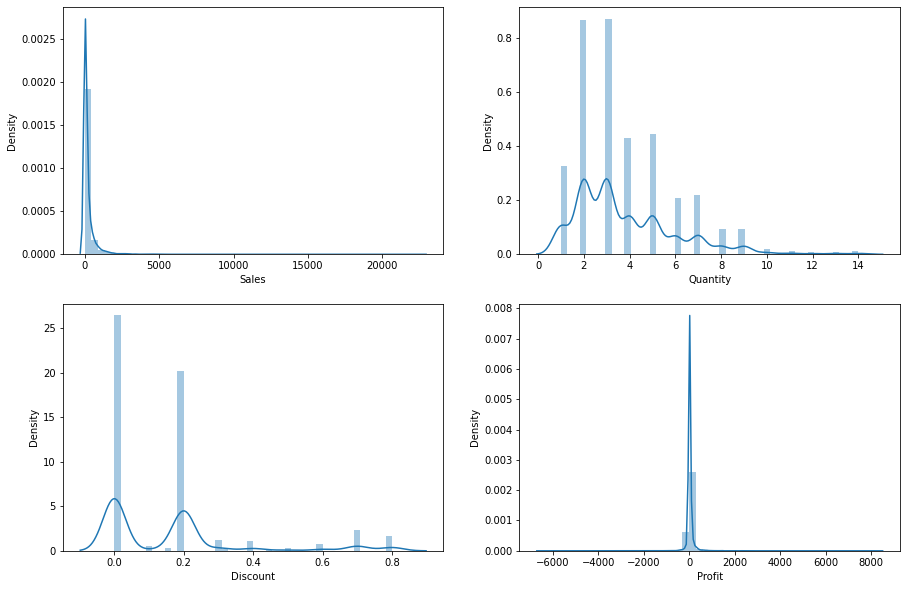

In [52]:
fig, axes = plt.subplots(figsize = (15, 10), nrows = 2, ncols = 2)
for i, ax in zip(super_store.describe().columns, axes.flat):
    sns.distplot(super_store[i], ax = ax);
plt.show()

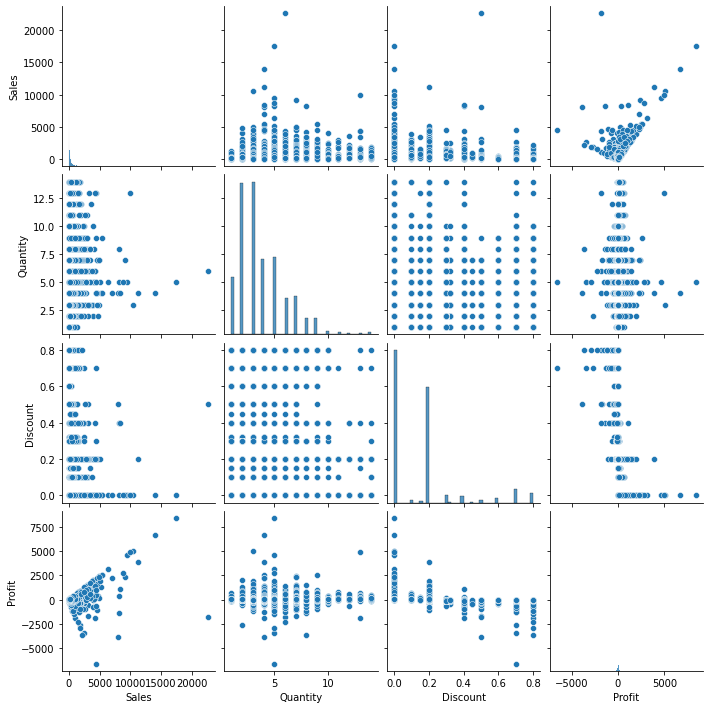

In [28]:
sns.pairplot(super_store)

In [29]:
super_store.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Sales'),
  Text(0, 1.5, 'Quantity'),
  Text(0, 2.5, 'Discount'),
  Text(0, 3.5, 'Profit')])

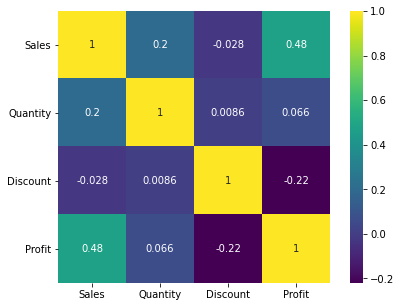

In [47]:
#Plotting a correlation heatmap
plt.figure(figsize = (7, 5))
sns.heatmap(super_store.corr(), annot = True, square = True, cmap = 'viridis')
plt.yticks(rotation = 0)

Sales          AxesSubplot(0.125,0.536818;0.352273x0.343182)
Quantity    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Discount          AxesSubplot(0.125,0.125;0.352273x0.343182)
Profit         AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

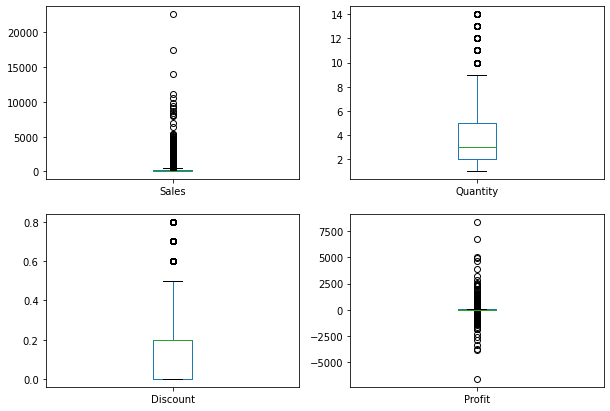

In [48]:
#Plotting Box-Whisker plots
super_store.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False, figsize = (10, 7))

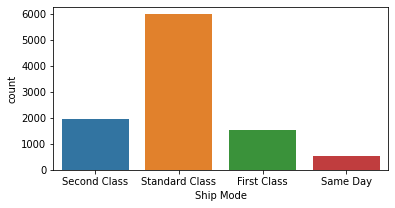

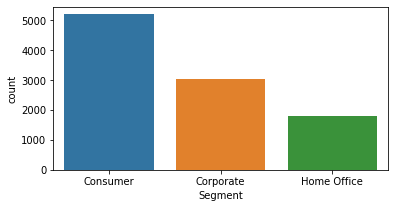

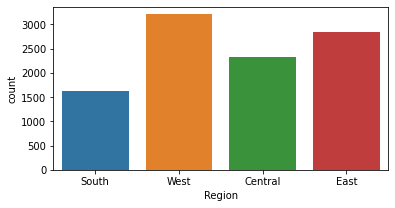

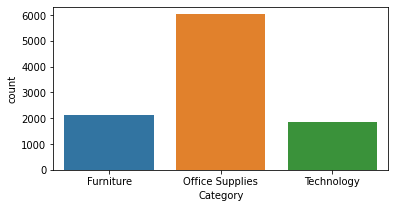

In [50]:

for i in super_store[['Ship Mode', 'Segment', 'Region', 'Category']]:
    plt.figure(figsize = (6, 3))
    sns.countplot(super_store[i]) 
    plt.show()

Text(0, 0.5, 'Frequency')

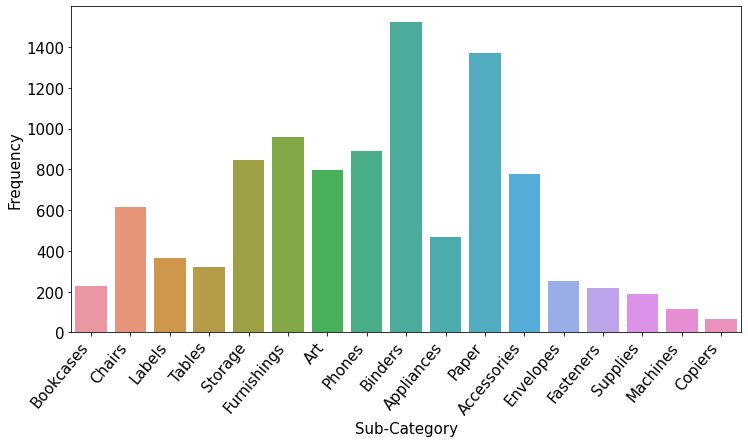

In [55]:
plt.figure(figsize = (12, 6))
sns.countplot(super_store['Sub-Category']) 
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(0.5, 6.79999999999999, 'Products')

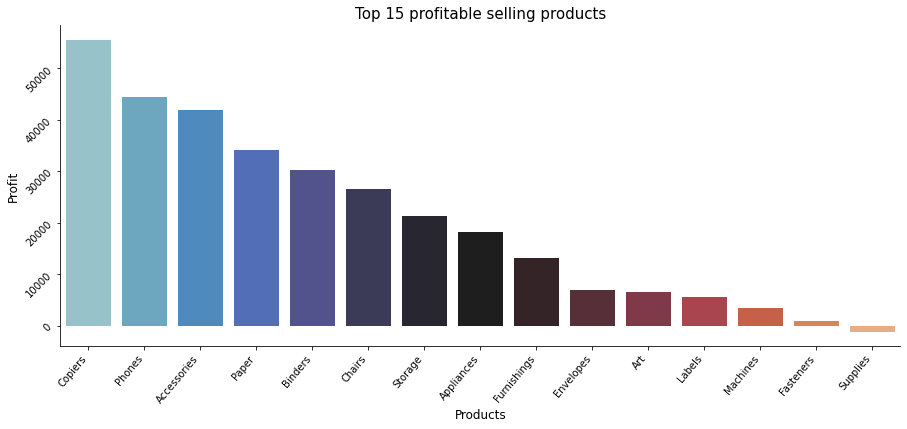

In [37]:
#Top 15 profitable selling products
top_15 = super_store.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
sns.catplot(x = 'Sub-Category', y = 'Profit', data = top_15.head(15), kind = 'bar', aspect = 2.5, palette = 'icefire')
plt.title('Top 15 profitable selling products', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 10)
plt.yticks(rotation=45,fontsize = 10)
plt.ylabel('Profit', fontsize = 12)
plt.xlabel('Products', fontsize = 12)

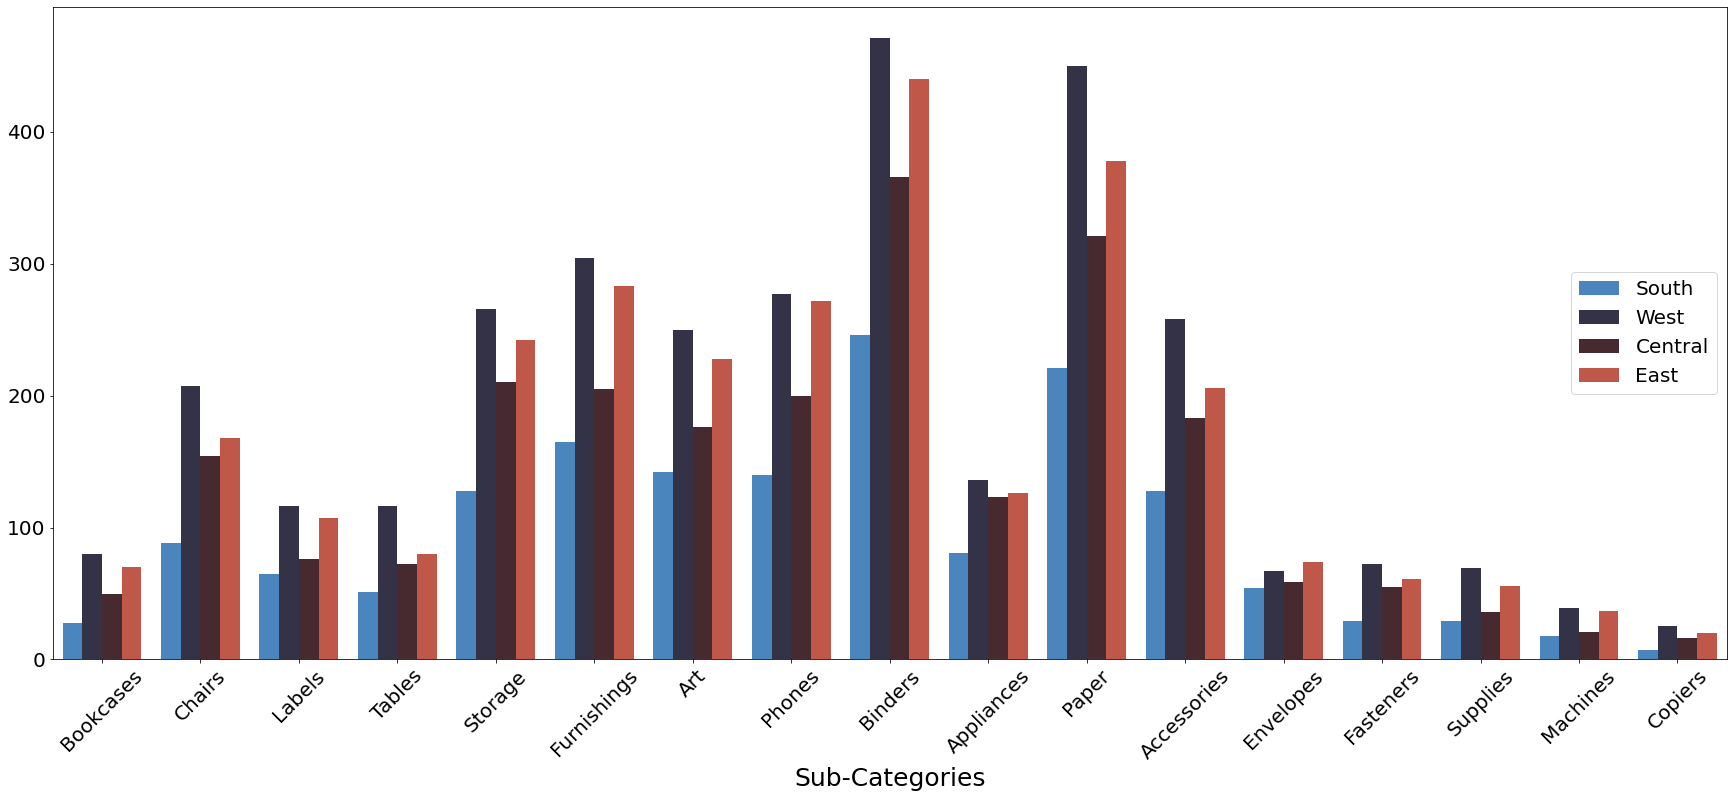

In [38]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = super_store, palette = 'icefire')
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

Text(0, 0.5, 'Frequency')

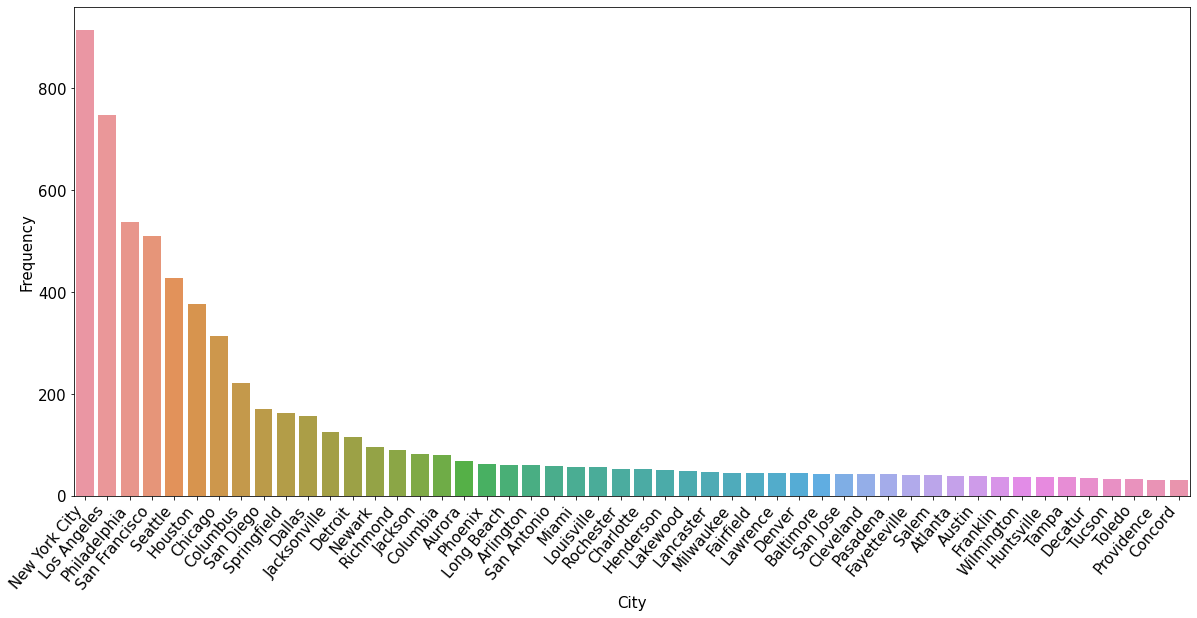

In [39]:
plt.figure(figsize = (20, 9))
sns.countplot(x = super_store['City'], order = (super_store['City'].value_counts().head(50)).index)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(-2.450000000000003, 0.5, 'Quantities ordered')

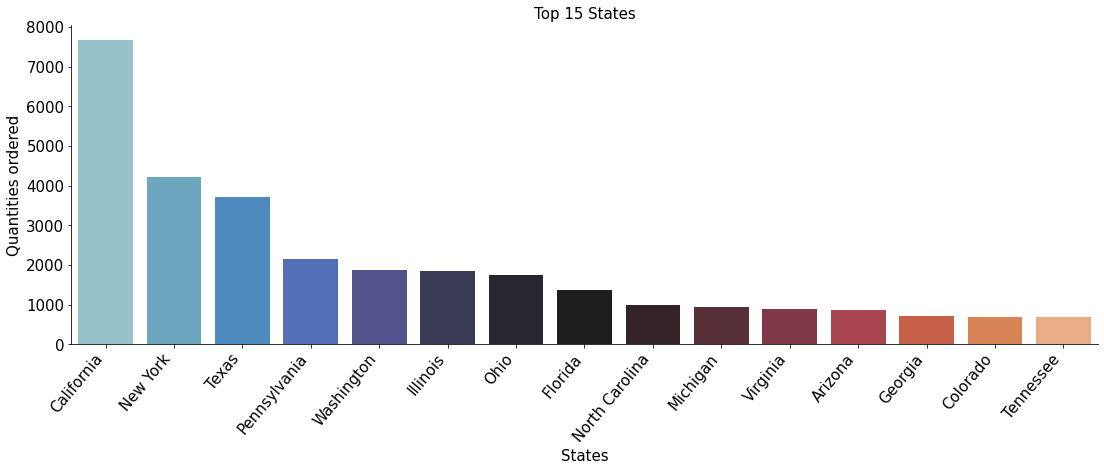

In [40]:
#To be more precise, we can get top 15 states for the above graph as shown below.
top_15 = super_store.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_15.head(15), kind = 'bar', palette = 'icefire', aspect = 3)
plt.title('Top 15 States', fontsize = 15)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Quantities ordered', fontsize = 15)

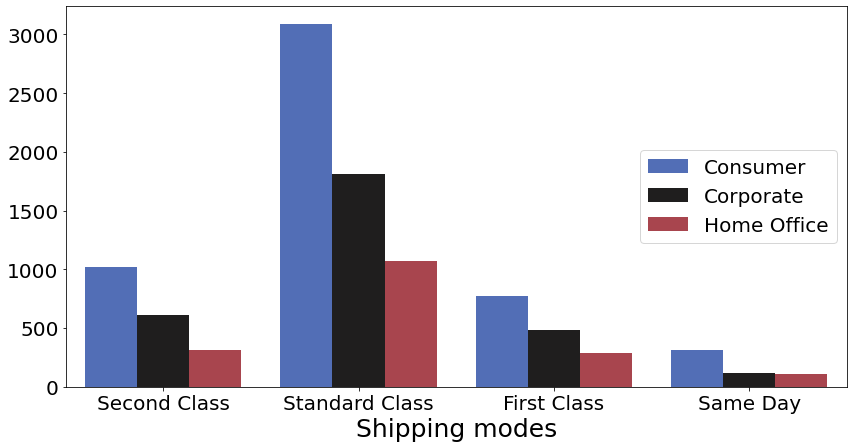

In [58]:
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Ship Mode', hue = 'Segment', data = super_store, palette = 'icefire')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping modes', fontsize = 25)
plt.ylabel('', fontsize = 20)
plt.legend(loc = 5, fontsize = 20)


Text(0.5, 1.0, 'Quantities ordered by each region')

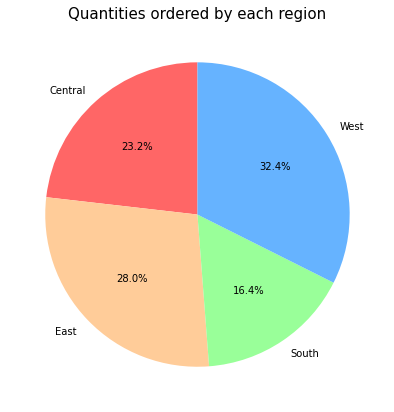

In [59]:
super_store_region = super_store.groupby('Region')['Quantity'].sum().reset_index()
plt.figure(figsize = (10, 7))
plt.pie(super_store_region['Quantity'], labels = super_store_region['Region'].unique(), autopct='%1.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Quantities ordered by each region', fontsize = 15)

Text(0.5, 1.0, 'Average profit divided between different regions')

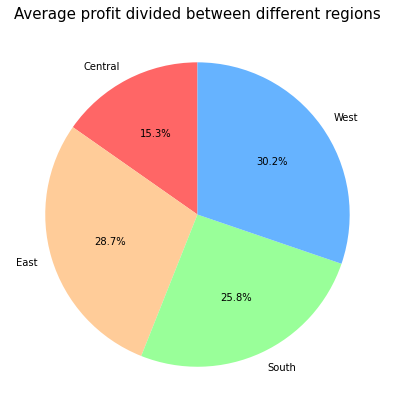

In [60]:
super_store_region = super_store.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize = (10, 7))
plt.pie(super_store_region['Profit'], labels = super_store_region['Region'].unique(), autopct = '%.1f%%', startangle = 90,
       colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.title('Average profit divided between different regions', fontsize = 15)

Text(0.5, 1.0, 'Products sold according to category')

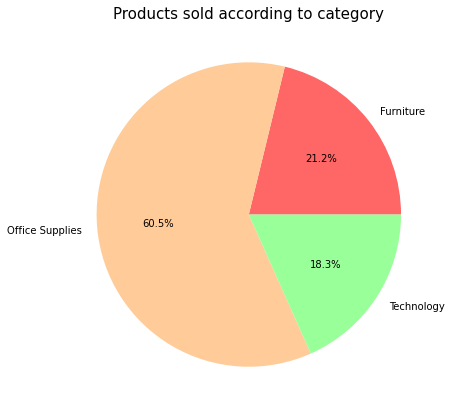

In [61]:
#Most selling categories
super_store_cat = super_store.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize = (10, 7))
plt.pie(x = super_store_cat['Quantity'], labels = super_store_cat['Category'].unique(), autopct = '%1.1f%%',
       colors = ['#ff6666', '#ffcc99', '#99ff99'])
plt.title('Products sold according to category', fontsize = 15)

([<matplotlib.patches.Wedge at 0x7f17cd276750>,
 [Text(0.9763276824947603, 0.5067388443709547, 'Binders'),
  Text(0.19978472989163298, 1.081705163943543, 'Paper'),
  Text(-0.5738784222686997, 0.9384367620966201, 'Furnishings'),
  Text(-0.9944482652289589, 0.470183631981287, 'Phones'),
  Text(-1.0940868088550497, -0.11390370797025917, 'Storage'),
  Text(-0.8953340580942692, -0.6390437578260567, 'Art'),
  Text(-0.4854447900078828, -0.9870883222154959, 'Accessories'),
  Text(-0.021437193482498344, -1.0997910923150787, 'Chairs'),
  Text(0.34701412694296424, -1.0438300607388218, 'Appliances'),
  Text(0.6045347489929012, -0.9189873433622958, 'Labels'),
  Text(0.786448767511178, -0.7690892900568498, 'Tables'),
  Text(0.9115071047427434, -0.6157554693248787, 'Envelopes'),
  Text(0.9940044193351475, -0.4711212310458919, 'Bookcases'),
  Text(1.0499830321338506, -0.3279262603558997, 'Fasteners'),
  Text(1.0832417906883753, -0.1912778683126777, 'Supplies'),
  Text(1.0965777941706178, -0.0867014494

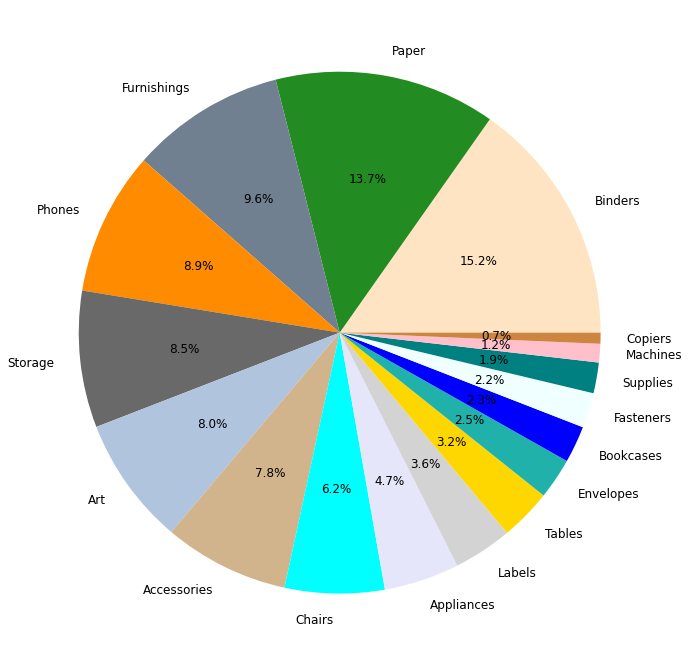

In [62]:
plt.figure(figsize=(13, 12))
plt.pie(x = super_store['Sub-Category'].value_counts(), labels = super_store['Sub-Category'].value_counts().index, 
       colors = ['bisque', 'forestgreen', 'slategrey', 'darkorange', 'dimgray', 'lightsteelblue', 'tan', 'cyan', 'lavender', 
                'lightgrey', 'gold', 'lightseagreen', 'blue', 'azure', 'teal', 'pink', 'peru'], autopct = '%1.1f%%', 
       textprops = {'fontsize': 12})